In [6]:
import numpy as np
import jax.numpy as jnp

import proplot as pplt

In [25]:
def kern_func(x):
    return jnp.where(
        x > 3,
        0,
        jnp.where(x < 0, 0, jnp.exp(-0.5 * x * x) / jnp.sqrt(2 * jnp.pi) / 2.0),
    )

def signal_func(x):
    return jnp.where((x > 2) & (x < 3), 1.0, jnp.zeros_like(x))

In [83]:
n = 100
x = jnp.linspace(0, 10, n)

signal = signal_func(x)
kern = kern_func(x)
kern /= jnp.sum(kern)

In [84]:
# do it by hand
nk = kern.shape[0]

csig_hand = np.zeros(n)
for i in range(n):
    maxn = min(i+nk, n)
    _nk = maxn - i
    csig_hand[i:maxn] += signal[i] * kern[:_nk]

In [85]:
csig = jnp.convolve(signal, kern, mode="full")

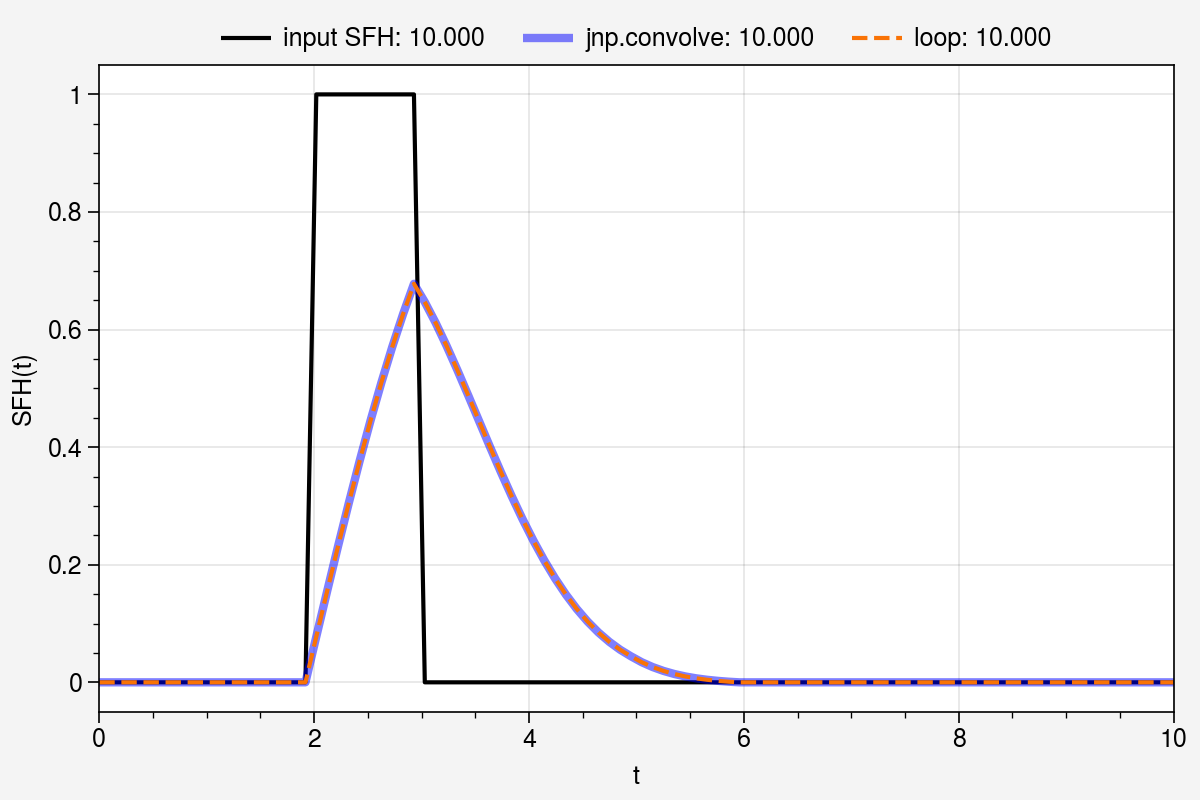

In [86]:
fig, axs = pplt.subplots(figsize=(6, 4))

axs.plot(x, signal, color="black", label=f"input SFH: {jnp.sum(signal):0.3f}")
axs.plot(x, csig[:len(x)], color="blue", linewidth=3, alpha=0.5, label=f"jnp.convolve: {jnp.sum(csig):0.3f}")
axs.plot(x, csig_hand, linestyle="dashed", color="orange", label=f"loop: {jnp.sum(csig_hand):0.3f}")
axs.legend(loc="t", frameon=False)
axs.format(xlabel="t", ylabel="SFH(t)")